# Homework 3
Due by 10/12/15 at 11:59pm EST

-----------





In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
## Start working 10/1/2015

## Problem 1 Regression (20 pts) 

### Problem 1a 

Compare different models for the regressionP1.txt file where you are to model output given combinations of the x1, x2, and x3 variables and find the best model.  Note that you can include not only the individual variables but the 2- and 3-way interactions that use the format x1:x2 or x1:x2:x3.  How did you determine the best model?


In [3]:
import statsmodels.api as statm

# Read text file into variable data using panda
# StudyNote: read_csv() if has no other args but file path, the read data when display will have \t between columns
# adding sep = '\t' will solve the problem as data = pd.read_csv('regressionP1.txt', sep='\t')
# another way is to use delim_whitespace = true
data = pd.read_csv('regressionP1.txt', delim_whitespace=True)

# ## scatter matrix
# pd.scatter_matrix(data, alpha=0.2, figsize=(14,14), diagonal='kde')

## create two way and three way interaction variable combinations
data['x1*x2'] = data['x1'] * data['x2']
data['x1*x3'] = data['x1'] * data['x3']
data['x2*x3'] = data['x2'] * data['x3']
data['x1*x2*x3'] = data['x1']*data['x2'] * data['x3']

# Extract the output column data into var y
y = data['output']

## Design the x input variables: all individual x and their interactions
x = data[['x1', 'x2', 'x3', 'x1*x2', 'x1*x3', 'x2*x3','x1*x2*x3']]
## Use Odinary Least Square method to build a linear regression model
model = statm.OLS(y, x)
# Analyze the fit result and print the summary
result = model.fit()
print(result.summary())


## Answer determing the best model:
# In the coefficient analysis below, we can see that the predictor variables of x1,x2 and x1*x2 are significant 
#because all of their p-values are smaller than 0.05 .x3 and other interaction combinations's p-values are greater than 
# the common alpha level of 0.05, which indicates that they not statistically significant.

## Design the x input variables: all individual x and their interactions
x1 = data[['x1', 'x2', 'x1*x2']]
## Use Odinary Least Square method to build a linear regression model
model = statm.OLS(y, x1)
# Analyze the fit result and print the summary
result = model.fit()
print(result.summary())

## Design the x input variables: all individual x and their interactions
x2 = data[['x1', 'x2']]
## Use Odinary Least Square method to build a linear regression model
model = statm.OLS(y, x2)
# Analyze the fit result and print the summary
result = model.fit()
print(result.summary())

# import numpy
# print numpy.corrcoef(a,b)

                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.203e+04
Date:                Thu, 08 Oct 2015   Prob (F-statistic):          1.60e-293
Time:                        20:12:54   Log-Likelihood:                -504.93
No. Observations:                 214   AIC:                             1024.
Df Residuals:                     207   BIC:                             1047.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8922      0.080     11.142      0.0

### Problem 1b
Using the best model from 1a), analyze the regression assumptions.  This should include at least a histogram of the residuals, residuals as a function of the output, and a q-q plot.  

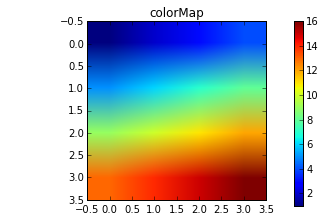

## Problem 2  Hierarchical Clustering (15 pts)

A set of data has the following distance matrix.  Use the distance matrix approach to cluster this data by hand or using python calculations.  Produce the following output of the form for a hierarchical clustering using the Centroid based clustering. 

HigherCol     LowerCol     distance


<img src='distmtx.png'>

## Problem 3  Gradient Search (15 pts)



### Problem 3a  

Use a gradient search approach to find the minimum value of:

f(x,y,z) = (z-3x)4 exp(x-y) + (3x + y + 2z + 7)2exp(y-z)

The gradient of the function is [dx dy dz] defined below. 

dx:	 -12(z-3x)3 exp(x-y) + (z-3x)4 exp(x-y) + 6(3x + y + 2z + 7)exp(y-z)

dy:	(z-3x) 4 exp(x-y)(-1) + 2(3x + y + 2z + 7)exp(y-z) + (3x+y+2z+7)2exp(y-z)

dz:	4(z-3x)3 exp(x-y) + 4(3x + y + 2z + 7)exp(y-z) - (3x + y + 2z + 7)2exp(y-z)

Start at least with [x=-1 y=0 z=1] and explore different learning rates (alpha).  How sensitive is the gradient to the initial starting point?


### Problem 3b

An extremely common error in gradient searches is that either the gradient equation or the implementation are wrong.  A quick check is to look at the neighborhood of a given start point.  For the starting point, verify that a point f(x+deltax, y+deltay, z+deltaz) is lower than f(x,y,z) where the  deltax, deltay, and deltaz are small numbers in the appropriate direction of the calculated gradient.

## Problem 4  K-Modes (35 pts)


### Problem 4a  
Write a k-modes algorithm.  We suggest that you find a k-means algorithm available pretty much everywhere and adapt it to perform k-modes for categorical data.   

### Problem 4b  
Cluster the attached sponge data using your k-modes algorithm.  Recall that the mode is the most frequently occurring pattern in categorical data.  Note that the first column of this data set is a set of labels, not data points.  To show the results, print a list of the output column labels on separate lines.  That is if you find 3 clusters (a,b,c), (d), (e,f), the output should look like

a b c<br/>
d<br/>
e f<br/>


### Problem 4c
Justify your choice of k

## Problem 5 Gaussian Mixture Model (15 pts)

Clustering using K-Means and Gaussian Mixture Models.  Cluster the gmmDataP5.txt file using 4 clusters for each.  You may need to try multiple different starting locations to get a stable result.   We recommend using the the scikit-learn k-Means and mixture GMM for this, although the PyMix from section would be equivalent and acceptable (but needs the older Python 2.7).   How do the results of the clustering compare?    Print the mean and covariances for the GMM, and the centroids for the k-means.
Plotting the raw data points and ellipses for the GMM is useful but optional, but worth a few bonus points.


### Problem 5 Bonus question:
Write your own implementation of EM algorithm applied to the Gaussian Mixture Models.  Apply it to the same data set.  You do not have to generalize it to N dimensions—2 dimensions is sufficient for this problem if that is easier.  
